<h1>Modeling Magnetic Anomalies<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Modeling-Magnetic-Anomalies" data-toc-modified-id="Modeling-Magnetic-Anomalies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Modeling Magnetic Anomalies</a></span><ul class="toc-item"><li><span><a href="#Theoretical-Background" data-toc-modified-id="Theoretical-Background-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Theoretical Background</a></span></li><li><span><a href="#In-the-esys.escript-form" data-toc-modified-id="In-the-esys.escript-form-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>In the <code>esys.escript</code> form</a></span></li><li><span><a href="#Domain" data-toc-modified-id="Domain-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Domain</a></span></li><li><span><a href="#Solution-of-PDE" data-toc-modified-id="Solution-of-PDE-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Solution of PDE</a></span></li><li><span><a href="#Magenetic-Anomaly" data-toc-modified-id="Magenetic-Anomaly-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Magenetic Anomaly</a></span></li><li><span><a href="#Transect" data-toc-modified-id="Transect-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Transect</a></span></li><li><span><a href="#Total-Magnetic-Anomaly-at-Different-Locations" data-toc-modified-id="Total-Magnetic-Anomaly-at-Different-Locations-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Total Magnetic Anomaly at Different Locations</a></span></li></ul></li></ul></div>

by Lutz Gross, The University of Queensland, Australia
<a href="mailto:l.gross@uq.edu.au">l.gross@uq.edu.au</a>
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.

# Modeling Magnetic Anomalies

In this section we discuss how to solve PDE for magnetic field anomalies due to a variation of
the magnetic susceptibility in the subsurface using `esys.escript`. It is assumed that you have 
worked through the [introduction section on `esys.escript`](escriptBasics.ipynb). 
First we will provide the basic theory:

## Theoretical Background
The observed magnetic field results $\mathbf{B}_t$ from the interaction
between the Earth's background field $\mathbf{B}_b$ and the magnetisation $\mathbf{M}$. 
Under the assumption of a small magnetisation the  
magnetisation is given as 
\begin{equation} 
\mathbf{M} = k \mathbf{B}_b
\end{equation}
where $k \ge 0$ is the magnetic susceptibility. 
The magnetisation induces a total magnetic field $\mathbf{B}_t$ which can be decomposed in the background field $\mathbf{B}_b$ and 
the magnetic anomaly field $\mathbf{B}_a$:
\begin{align} 
\mathbf{B}_t & = \mathbf{B}_b + \mathbf{B}_a
\end{align}
In the SI system $\mathbf{B}$ has the units is in Tesla $T$. The Earth's background field $\mathbf{B}_b$ varies between $25,000$ and $65,000 nT$ ($nT = 10^{-9} T $ refers to *nano Tesla*) 

The total magnetic field anomaly $b_a$ is the difference of the intensity of the 
total magnetic field $\mathbf{B}$ and of the background field $\mathbf{B}_H$: 
\begin{equation} 
b_a=|\mathbf{B}_t|-|\mathbf{B}_b| 
\end{equation}
where in 2D with $x_0$ parallel to Earth surface (e.g. North-South) and $x_1$ upwards.
\begin{equation} 
|\mathbf{B}| = \sqrt{B_x^2 + B_z^2} \mbox{ if }  \mathbf{B}=[B_0, B_1]^T
\end{equation}
For a small anomaly field the following approximation
\begin{equation} 
b_a=\frac{\mathbf{B}_b^T}{|\mathbf{B}_b|} \mathbf{B}_a
\end{equation}
can be used.
The total magnetic field anomaly $b_a$ is what is measured in the field.

The Gauss's law for magnetism states that the magnetic flux $\mathbf{B}_f=\mathbf{B}_t+\mathbf{M}$
is divergence free:
\begin{equation} 
\nabla^t \mathbf{B}_f = 0
\end{equation}
Assuming that $\nabla^t \mathbf{B}_b=0$ this simplifies to  
\begin{equation} \label{EQGAUSS}
\nabla^t  (\mathbf{B}_a + k \mathbf{B}_b )  = 0
\end{equation}
Analogously to gravity one can introduce a scalar potential $U$ with 
\begin{equation} \label{EQPOTENTIAL}
\mathbf{B}_a = - \nabla U = (-\frac{\partial U}{\partial x}, -\frac{\partial U}{\partial z})
\end{equation}
in the 2D case. Equations \eqref{EQGAUSS} and \eqref{EQPOTENTIAL} form a PDE for the scalar potential $U$.

## In the `esys.escript` form

We use a local Cartesian coordinate system with $x_0$ being the south-north (SN) direction and $x_1$ upwards.

Recall the `esys.escript` PDE template: When $u$ is the unknown
the `flux` vector $\mathbf{F}$ is defined as 
\begin{equation} \label{EQFLUX}
\mathbf{F} = - \mathbf{A} \mathbf{\nabla} u +\mathbf{X}
\end{equation} 
with some matrix $\mathbf{A}$ and some vector $\mathbf{X}$. Then the flux vector $\mathbf{F}$ needs to fulfill the conservation equation : 
\begin{equation}\label{EQCONSERVATION}
\mathbf{\nabla}^t \; \mathbf{F} + D \; u = Y 
\end{equation}
where $D$ is a scalar and $Y$ is the right hand side. 

We identify the flux $\mathbf{F}$ from \eqref{EQGAUSS} as $\mathbf{B}_a + k \mathbf{B}_b$ which gives 
with \eqref{EQPOTENTIAL}
\begin{equation} \label{EQFLUX2}
\mathbf{F} = -  \mathbf{\nabla} U +k \mathbf{B}_b
\end{equation} 
from which we see that we need to choose 
$\mathbf{A}$ as the identity matrix and $\mathbf{X}=k \mathbf{B}_b$ (that is the magnetization). 
In this case it is $D=0$ and $Y=0$.

## Domain

For a domain of $20 \times 20 km$ we want to model the total magnetic field anomaly $b_a$ over a horizontal 
transect. The transect is located at a height of $H_0=12000m$ above the bottom edge of the domain and
is assumed to define the surface of the Earth. 
The magnetic anomaly is produced by a vertical dyke of width $w=60m$ where the top end 
of the dyke is located at a depth $D=1000m$ below the surface along the vertical center line of the domain
(at $x_0=5000m$). It is assumed that a 2D model is sufficient.
Of particular interest is the question how the total magnetic field response of the dyke 
would eb different at the North Pole, the South Pole and the equator.

<img src="./Data/IMAGE_Dyke.jpg">



In [1]:
L0=20000       # horizonal length of domain [m]
L1=20000       # vertical length of domain [m]

NE0=250        # number of element in horizontal x0 direction
NE1=250        # number of element in vertical x1 direction



b_b=45000.0    # =length(B_b) = intensity of the background magnetic field in nT

k_dyke=0.05    # susceptibility in the dyke
H_dyke=12000   # height [m] of the top of the dyke from the bottom of the domain
w_dyke_NE=5    # width of the dyke expressed in number of elements

D=500          # distance [m] of transect above top of dyke

Before we can do any modeling we need to set up the domain. This analogously to the gravity case.

In [3]:
import numpy as np
from esys.escript import *
from esys.finley import Rectangle

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Set up the domain:

We recover the element edge length in horizontal direction `h0` and in vertical direction `h1`: 

## Solution of PDE

Now we are ready to set up the PDE we need to solve to obtain the scalar potential $U$ for the 
magnetic field anomaly $\mathbf{B}_a$:

The easy bit is to `A`. It is the same as in the gravity case: 
\begin{equation}
\begin{bmatrix}
A_{00} & A_{01} \\
A_{10}  & A_{11} 
\end{bmatrix}= 
\begin{bmatrix}
1 & 0  \\
0  & 1 
\end{bmatrix}
\end{equation}

Again we fix the potential to zero at the top and the bottom of the domain:

The magnetization $\mathbf{M}$ is defined as product of the 
background magnetic field $\mathbf{B}_b$ 
and the susceptibility $k$. As shown earlier this becomes the value for $\mathbf{X}$
in the PDE template.

We start with defintition of the susceptibility $k$. We want this to have the value
`k_dyke` at locations in the dyke and zero elsewhere.
The location of the dyke is defined for locations $(x_0, x_1)$ for which
the vertical coordinate $x_1$ is below $H_0$ and which horizontal 
coordinate $x_0$ has a distance from the central vertical axis at $x_0=\frac{L0}{2}$ lower then
half of the dyke width $w$ which is `w=w_NE * h0`. 

This time we define the susceptibility at the center of elements:

First we mark all elements with a center below `H_dyke` the level of the transect.

As second condition we want to have a positive susceptibility $k$ only for those location that are 
less then $\frac{w}{2}$ away from the central vertical line at $x_0=\frac{L0}{2}$ that means 
that 
\begin{equation}
| x_0 -  \frac{L0}{2} | < \frac{w}{2}
\end{equation}
which is implemented using the `whereNegative` once again: 

Now the product The susceptibility $k$ is then set to:

Let's quickly check if we have done the right thing and plot the distribution of `k` with
`matplotlib`:

In [57]:
#%matplotlib notebook # activate for interactive plots
import matplotlib.pyplot as plt

Again we first need to convert `k` and the locations where values are stored into `numpy` arrays: 

And then we can create a contour plot:

Text(0.5, 1.0, 'susceptibility distribution')

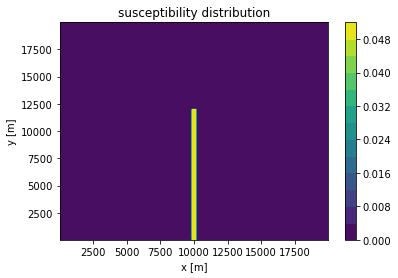

In [59]:
plt.figure()
plt.tricontourf(x_np[0], x_np[1], k_np[0], 15)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.colorbar()
plt.title("susceptibility distribution")

The background magnetic field $\mathbf{B}_b$ in the $x_0x_1$-plane (which is the plane we are using here) is given
\begin{equation} 
\mathbf{B}_g = b_b \begin{bmatrix}
-cos(\Theta)\\
sin(\Theta)
\end{bmatrix}
\end{equation} 
where $b_b$ is the background magnetic field intensity and $\Theta$ is the inclination angle. 
Notice 
 - $\Theta=0^o$ refers to equator (SN - magnetic field)
 - $\Theta=90^o$ refers to North Pole (upwards vertical - magnetic field)
 - $\Theta=-90^o$ refers to South Pole (downwards vertical - magnetic field),

With $x=x_0$ has horizontal direction and $y=x_1$ downwards direction
<img src="./Data/IMAGE_CS1.png">

In [60]:
THETA_BNE = 57. # background mag. field inclination angle Brisbane in deg
THETA=THETA_BNE

The vector of orientation of the background magnetic field is  is given as 
$$ \mathbf{N}= \begin{bmatrix}
-cos(\Theta)\\
sin(\Theta)
\end{bmatrix}
$$

The magnetisation  $\mathbf{M} = k \mathbf{B}_b$ sets the coefficient `X`. 
We need to set this on integration points enforced by using `Function(domain)` as `FunctionSpace` attribute:  

Notice that in the product `k*B_b` the `FunctionSpace` attributes do not match. Behind the scene an interpolation is applied in the sense that the value of `k` at the element centers are copied to the numerical integration points assuming that the value of susceptibility is constant within each element.   

Finally we need to set Dirichlet-type boundary conditions. In this case the potential is set to zero 
at the top and bottom of the domain. This applies to the FEM nodes with $x_1=0$ or $x_1=L1$. Again we use masks 
to do this:

The mask to mark  Dirichlet-type boundary conditions is then the sum of `q_bottom` and `q_top`:

Now we solve the PDE to get the magnetic potential $u$:

## Magenetic Anomaly
Now we can get magenetic anomaly field $\mathbf{B}_a$ as the gradient of the scalar potential. Here we calculate
the gradient at the center of elements:

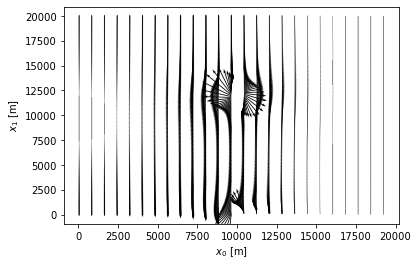

In [67]:
B_a_np=convertToNumpy(B_a)
X_np=convertToNumpy(B_a.getX())

plt.figure()
plt.xlabel('$x_0$ [m]')
plt.ylabel('$x_1$ [m]')
plt.quiver(X_np[0,::10], X_np[1,::10], B_a_np[0, ::10], B_a_np[1,::10])

We want to get the total magnetic field anomaly $b_a$ which we can calculate as $b_a=\mathbf{N}^T \mathbf{B}_a$ 
as $\mathbf{N} = \frac{\mathbf{B}_b}{|\mathbf{B}_b|} $ is the orienation of the background magnetic field. 

In [68]:
b_a=inner(B_a, Vector(N, B_a.getFunctionSpace()))

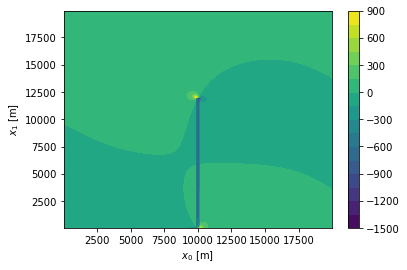

In [69]:
plt.figure()
contour=plt.tricontourf(X_np[0], X_np[1], convertToNumpy(b_a)[0], 15)
plt.xlabel('$x_0$ [m]')
plt.ylabel('$x_1$ [m]')
plt.colorbar(contour)

## Transect 

The total magnetic field anomaly $b_a$ is calculated and its values are picked along the transect.
We need to define points of the transect and we try to pick the element centers at a height `D` above the top of the dyke. 
First we create the $x_0$ coordinates starting from $h0/2$ which is the $x_0$ of the 
first element center:

In [70]:
x0_transect=np.linspace(h0/2, L0-h0/2, NE0)

Here we also define the `Locator` to pick the values for the total magnetic field anomaly `b_a`  from a 
`Data` object. Again we first create the offsets along the transect.

We then add the appropriate $x_1$ coordinate (=`H_dyke+D`) to build up the 2D coordinates in the domain: 

Now we are ready to create the `Locator` named `transect_locator` which we use to fetch the values 
of the total magnetic field anomaly $b_a$ along the transect:

And then we can pick the values of `b_a` along the transect:

In [74]:
b_a_transect=transect_locator.getValue(b_a)

The `transect_locator` could have moved the requested point `x_transect` locations toward 
element centers so we get the true $x_0$-coordinates (=offset within the transect) which we use for plotting:

Now we can plot the total magnetic field anomaly along the transect: 

## Total Magnetic Anomaly at Different Locations

We want compare the total magnetic field anomaly transect $b_a$ we have just calculated 
at different locations on the Earth. For this we need the inclination of the background magnetic field
at these locations. 

To simplify the coding we write a function `getTotalMagneticFieldAnomaly` that takes a
inclination angle (and background magnetic field anomaly `b_0=b_b`) and returns the total magnetic field anomaly along the transect.